# Electrical Conductivity and Resistivity of Materials at 20°C
This notebook visualizes the conductivity and resistivity of materials using log-scale bar charts. It includes materials with fixed values and ranges.

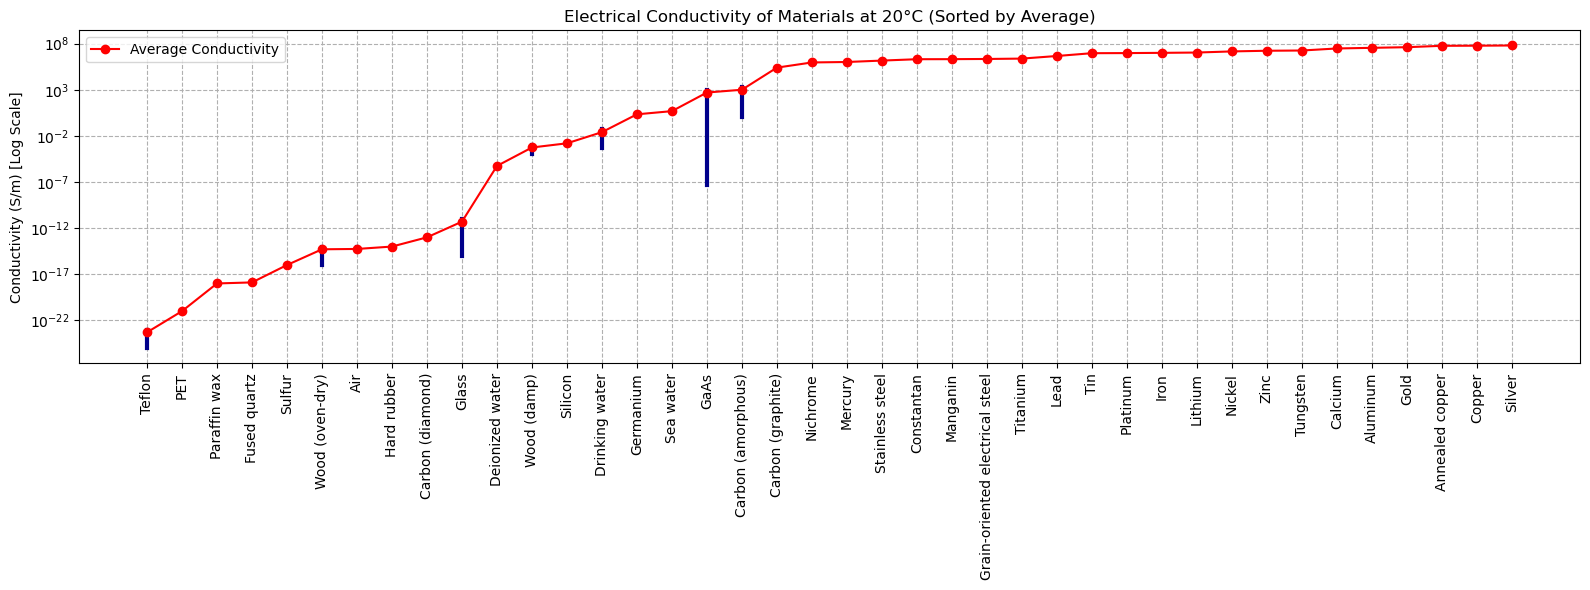

In [9]:
# https://www.thoughtco.com/table-of-electrical-resistivity-conductivity-608499
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Recreate the data
data = [
    ("Silver", 1.59e-8, 6.30e7),
    ("Copper", 1.68e-8, 5.96e7),
    ("Annealed copper", 1.72e-8, 5.80e7),
    ("Gold", 2.44e-8, 4.10e7),
    ("Aluminum", 2.82e-8, 3.5e7),
    ("Calcium", 3.36e-8, 2.98e7),
    ("Tungsten", 5.60e-8, 1.79e7),
    ("Zinc", 5.90e-8, 1.69e7),
    ("Nickel", 6.99e-8, 1.43e7),
    ("Lithium", 9.28e-8, 1.08e7),
    ("Iron", 1.0e-7, 1.00e7),
    ("Platinum", 1.06e-7, 9.43e6),
    ("Tin", 1.09e-7, 9.17e6),
    ("Carbon steel (1010)", 1.43e-7, None),
    ("Lead", 2.2e-7, 4.55e6),
    ("Titanium", 4.20e-7, 2.38e6),
    ("Grain-oriented electrical steel", 4.60e-7, 2.17e6),
    ("Manganin", 4.82e-7, 2.07e6),
    ("Constantan", 4.9e-7, 2.04e6),
    ("Stainless steel", 6.9e-7, 1.45e6),
    ("Mercury", 9.8e-7, 1.02e6),
    ("Nichrome", 1.10e-6, 9.09e5),
    ("GaAs", "5e-7 to 1e-2", "5e-8 to 1e3"),
    ("Carbon (amorphous)", "5e-4 to 8e-4", "1.25 to 2e3"),
    ("Carbon (graphite)", "2.5e-6 to 5e-6", "2e5 to 3e5"),
    ("Carbon (diamond)", 1e12, 1e-13),
    ("Germanium", 4.6e-1, 2.17),
    ("Sea water", 2e-1, 4.8),
    ("Drinking water", "20 to 2000", "5e-4 to 5e-2"),
    ("Silicon", 6.40e2, 1.56e-3),
    ("Wood (damp)", "1e3 to 4", "1e-4 to 1e-3"),
    ("Deionized water", 1.8e5, 5.5e-6),
    ("Glass", "1e11 to 1e14", "1e-11 to 1e-15"),
    ("Hard rubber", 1e13, 1e-14),
    ("Wood (oven-dry)", "1e14 to 1e16", "1e-16 to 1e-14"),
    ("Sulfur", 1e15, 1e-16),
    ("Air", "1.3e16 to 3.3e16", "3e-15 to 8e-15"),
    ("Paraffin wax", 1e17, 1e-18),
    ("Fused quartz", 7.5e17, 1.3e-18),
    ("PET", 1e21, 1e-21),
    ("Teflon", "1e22 to 1e24", "1e-25 to 1e-23")
]
df = pd.DataFrame(data, columns=["Material", "Resistivity (Ω·m)", "Conductivity (S/m)"])

# Parse ranges and compute averages
def parse_range(value):
    try:
        parts = str(value).replace(' ', '').split('to')
        return float(parts[0]), float(parts[1])
    except:
        return np.nan, np.nan

df["Cond Min"], df["Cond Max"] = zip(*df["Conductivity (S/m)"].map(parse_range))
df["Res Min"], df["Res Max"] = zip(*df["Resistivity (Ω·m)"].map(parse_range))

numeric_mask = pd.to_numeric(df["Conductivity (S/m)"], errors='coerce').notnull()
df.loc[numeric_mask, "Cond Min"] = df.loc[numeric_mask, "Conductivity (S/m)"].astype(float)
df.loc[numeric_mask, "Cond Max"] = df.loc[numeric_mask, "Conductivity (S/m)"].astype(float)
df.loc[numeric_mask, "Cond Avg"] = df.loc[numeric_mask, "Conductivity (S/m)"].astype(float)
df.loc[numeric_mask, "Res Min"] = pd.to_numeric(df.loc[numeric_mask, "Resistivity (Ω·m)"], errors='coerce')
df.loc[numeric_mask, "Res Max"] = pd.to_numeric(df.loc[numeric_mask, "Resistivity (Ω·m)"], errors='coerce')

df["Cond Avg"] = (df["Cond Min"] + df["Cond Max"]) / 2
df["Res Avg"] = (df["Res Min"] + df["Res Max"]) / 2
df.dropna(subset=["Cond Avg", "Res Avg"], inplace=True)
df.sort_values("Cond Avg", inplace=True)

# Plot conductivity
plt.figure(figsize=(16, 6))
for i, row in df.iterrows():
    plt.plot([row['Material'], row['Material']], [row['Cond Min'], row['Cond Max']], color='darkblue', linewidth=3)
plt.plot(df['Material'].to_numpy(), df['Cond Avg'].to_numpy(), 'ro-', label='Average Conductivity')
plt.yscale('log')
plt.xticks(rotation=90)
plt.ylabel('Conductivity (S/m) [Log Scale]')
plt.title('Electrical Conductivity of Materials at 20°C (Sorted by Average)')
plt.grid(True, which='both', linestyle='--')
plt.tight_layout()
plt.legend()
plt.show()


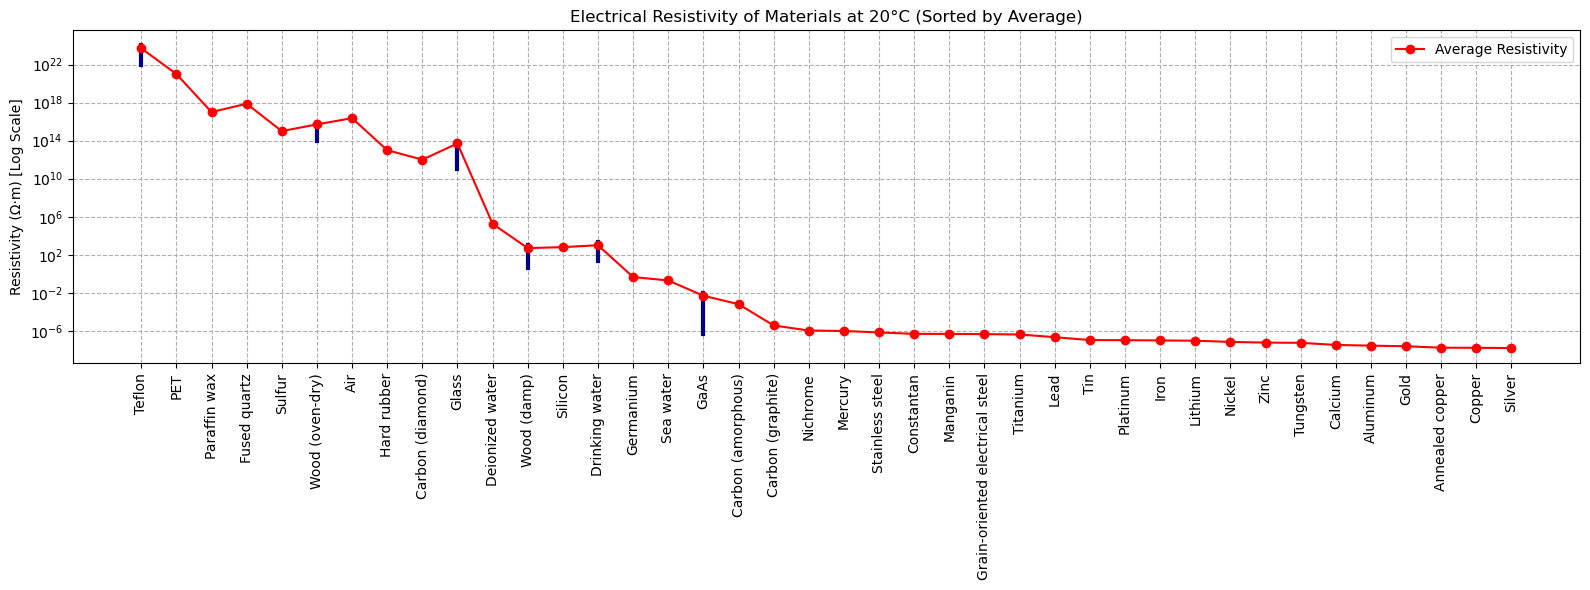

In [10]:
# Plot resistivity
plt.figure(figsize=(16, 6))
for i, row in df.iterrows():
    plt.plot([row['Material'], row['Material']], [row['Res Min'], row['Res Max']], color='darkblue', linewidth=3)
plt.plot(df['Material'].to_numpy(), df['Res Avg'].to_numpy(), 'ro-', label='Average Resistivity')
plt.yscale('log')
plt.xticks(rotation=90)
plt.ylabel('Resistivity (Ω·m) [Log Scale]')
plt.title('Electrical Resistivity of Materials at 20°C (Sorted by Average)')
plt.grid(True, which='both', linestyle='--')
plt.tight_layout()
plt.legend()
plt.show()